# *Prediction model for profit of 50_startups data.*

## *Step 1:*

### *Importing Necessary Libraries*

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## *Step 2*

### *Understanding Dataset*

#### 1. Reading File

In [188]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

#### 2. Knowing Data

In [189]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [190]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [191]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [192]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

#### 3. Correlation Matrix

In [193]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


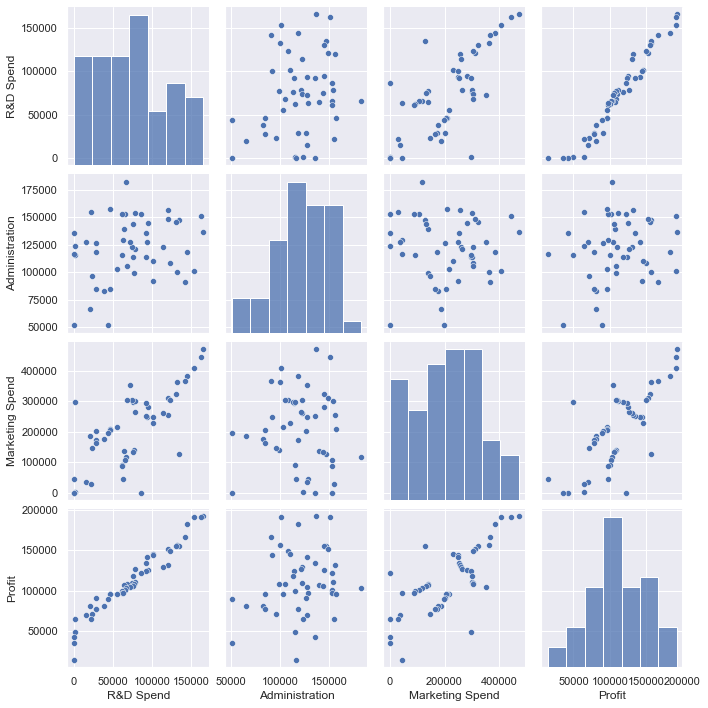

In [194]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [195]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [196]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<AxesSubplot:>

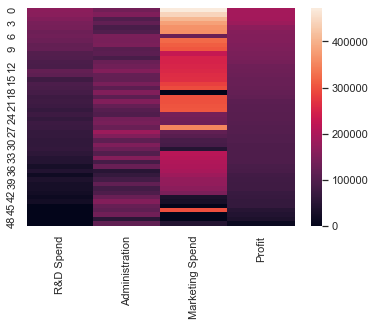

In [197]:
sns.set_theme(style='darkgrid')
sns.heatmap(b)

In [198]:
c = pd.concat([a,b],axis=1)
c.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


#### 4. Concancated Final Table

In [199]:
df = c.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
df.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


## *Step 3*
### *Build Model*

### Using OLS Method without any Transformation

In [200]:
model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=df).fit()
model.params

Intercept         50125.343832
Florida             198.788793
NY                  -41.887019
RDS                   0.806023
Administration       -0.027004
MS                    0.026980
dtype: float64

In [201]:
t = model.tvalues
p = model.pvalues
print("Coefficients = \n" + str(t))
print("\n\np-value = \n" + str(p))

Coefficients = 
Intercept          7.280560
Florida            0.058970
NY                -0.012864
RDS               17.368580
Administration    -0.517012
MS                 1.573889
dtype: float64


p-value = 
Intercept         4.444178e-09
Florida           9.532429e-01
NY                9.897941e-01
RDS               2.578772e-21
Administration    6.077373e-01
MS                1.226769e-01
dtype: float64


#### Raw Model Accuracy

In [202]:
A1 = model.rsquared
A1

0.9507524843355148

In [203]:
# Making Individual Regression Model

m1_florida = smf.ols('Profit~Florida',data=df).fit()
m1_NY = smf.ols('Profit~NY',data=df).fit()
m1_RDS = smf.ols('Profit~RDS',data=df).fit()
m1_AD = smf.ols('Profit~Administration',data=df).fit()
m1_MS = smf.ols('Profit~MS',data=df).fit()

In [204]:
m1_florida.pvalues,m1_NY.pvalues,m1_RDS.pvalues,m1_AD.pvalues,m1_MS.pvalues

(Intercept    1.586129e-20
 Florida      4.214479e-01
 dtype: float64,
 Intercept    1.616581e-20
 NY           8.287963e-01
 dtype: float64,
 Intercept    2.782697e-24
 RDS          3.500322e-32
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

#### From here it seems Administration data is having p > 0.05, let's have a further analysis for getting conclusion

### Calculating VIF

In [205]:
rsq_Florida = smf.ols('Florida~NY+RDS+Administration+MS',data=df).fit().rsquared
rsq_NY = smf.ols('NY~Florida+RDS+Administration+MS',data=df).fit().rsquared
rsq_RDS = smf.ols('RDS~Florida+NY+Administration+MS',data=df).fit().rsquared
rsq_AD = smf.ols('Administration~Florida+NY+MS',data=df).fit().rsquared
rsq_MS = smf.ols('MS~Florida+NY+RDS+Administration',data=df).fit().rsquared
vif_Florida = 1 / (1-rsq_Florida)
vif_NY = 1 / (1-rsq_NY)
vif_RDS = 1 / (1-rsq_RDS)
vif_AD = 1 / (1-rsq_AD)
vif_MS = 1 / (1-rsq_MS)

In [206]:
d = {'Variables':['Florida','NY','RDS','AD','MS'],'VIF Values':[vif_Florida,vif_NY,vif_RDS,vif_AD,vif_MS]}
vif_frame = pd.DataFrame(d)
vif_frame

,Variables,VIF Values
0,Florida,1.387641
1,NY,1.335061
2,RDS,2.495511
3,AD,1.001557
4,MS,2.416797


### Residual Analysis

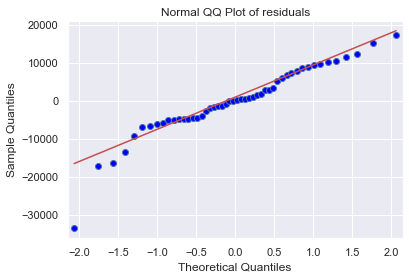

In [207]:
qqplot = sm.qqplot(model.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

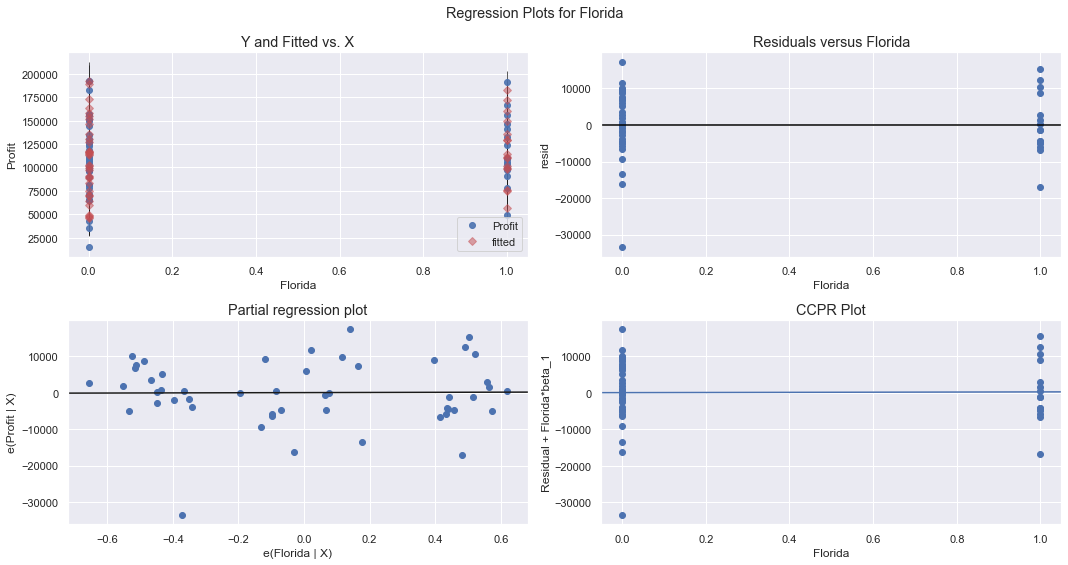

In [22]:
# Florida
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'Florida',fig=fig)
plt.show()

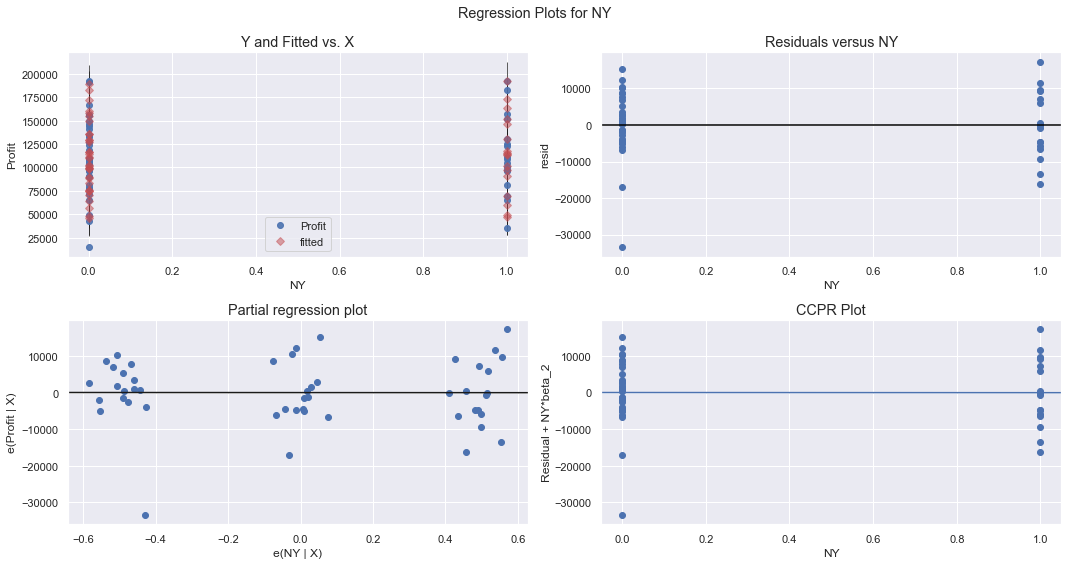

In [23]:
# NY
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'NY',fig=fig)
plt.show()

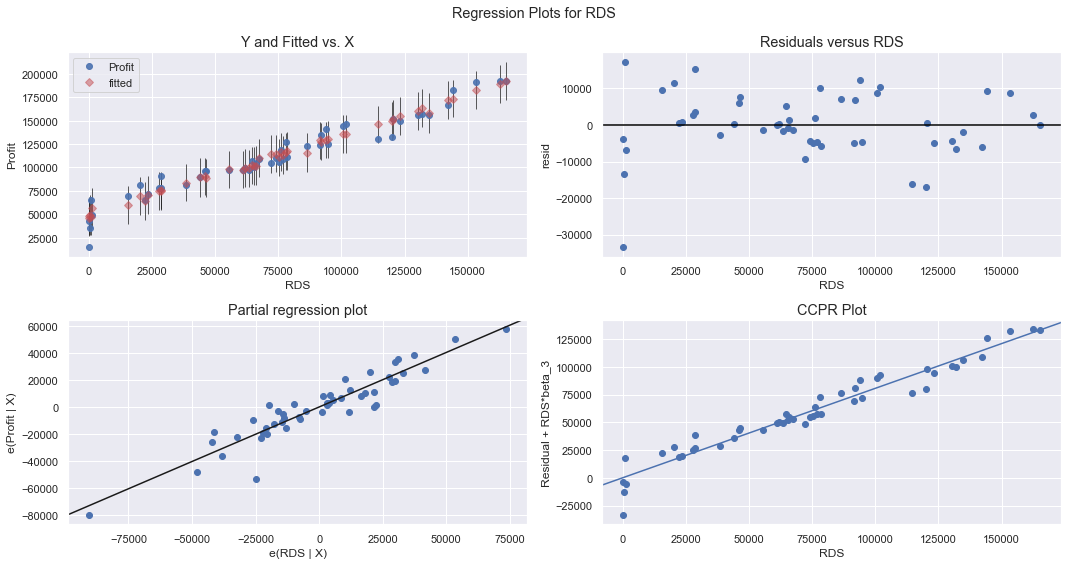

In [24]:
# RDS
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()   

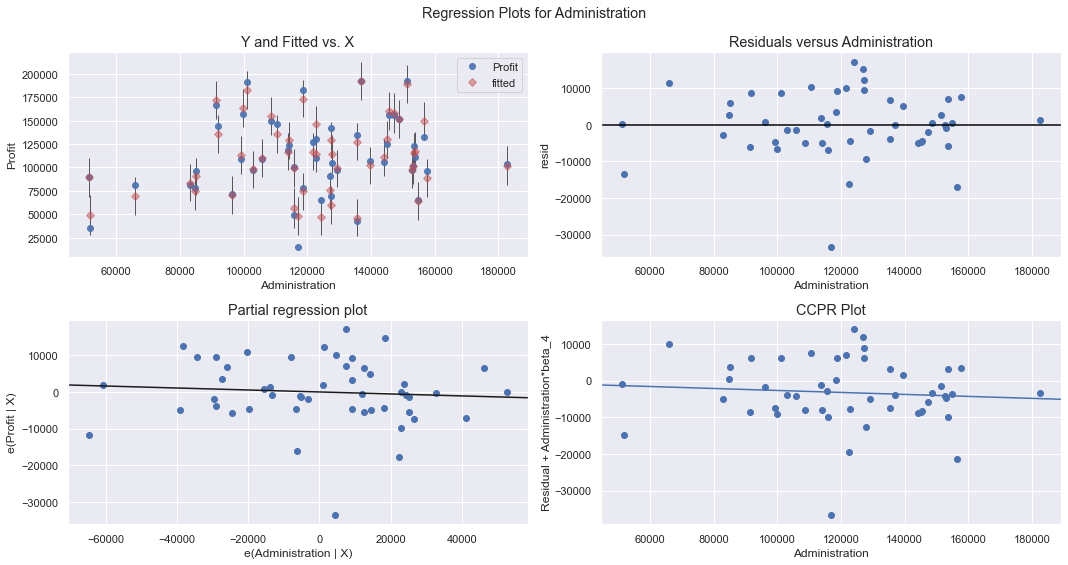

In [25]:
# AD
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

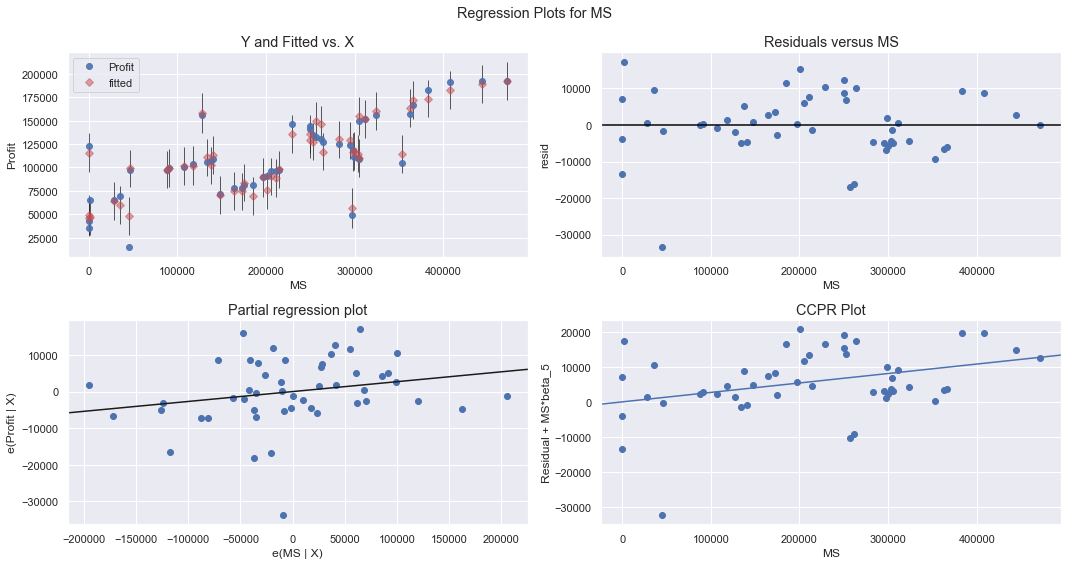

In [26]:
# MS
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

## Step 4

### Model Delettion Diagnostic

#### Cook's Distance

In [208]:
model_influence = model.get_influence()
(c,x) = model_influence.cooks_distance

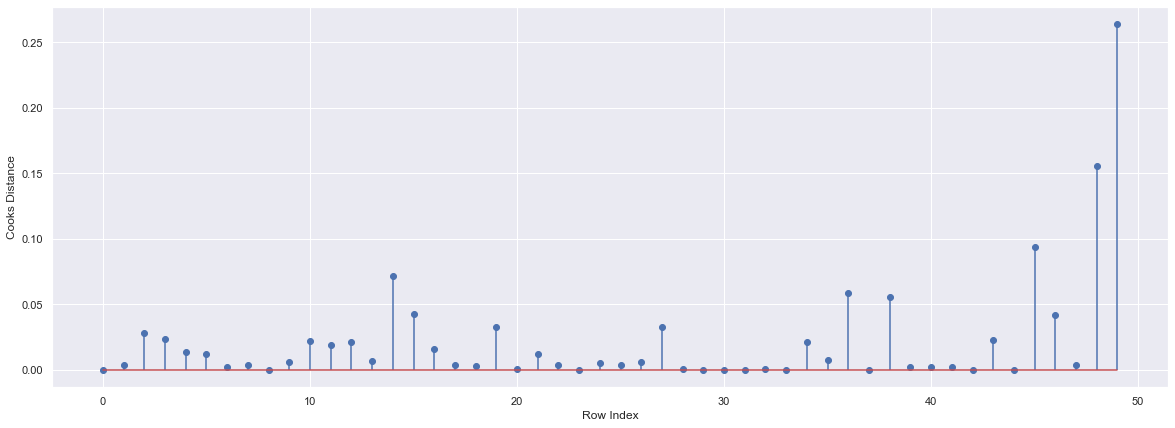

In [209]:
# Plot influencers using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

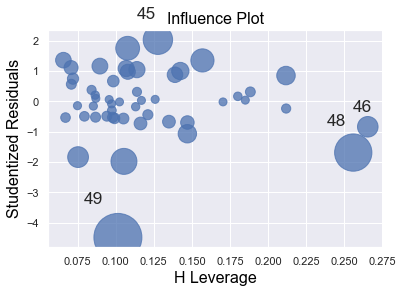

In [29]:
# Influencers

influence_plot(model)
plt.show()

## *Improving the Model*

In [210]:
df_new = df.drop(df.index[[45,46,48,49]],axis=0).reset_index()
df_new = df_new.drop(['index'],axis=1)

## Final Model Building

In [211]:
final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=df_new).fit()
finalmodelwt = final_model.rsquared
final_model.params

Intercept         57259.700904
Florida            -912.428437
NY                -1744.998960
RDS                   0.773029
Administration       -0.052036
MS                    0.028312
dtype: float64

In [212]:
new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predictwt = final_model.predict(new_data)
predictwt

1    171811.495683
dtype: float64

## *Applying Different Transformation Method*

### *Method 1 : Standardization*

In [213]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [214]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [217]:
data=b
data.iloc[:,:] = StandardScaler().fit_transform(data.iloc[:,:])
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [216]:
c = pd.concat([a,b],axis=1)
c.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [218]:
data = c.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


#### Finding Correlation

In [219]:
data.corr()

,Florida,NY,RDS,Administration,MS,Profit
Florida,1.000000,-0.492366,0.105711,0.010493,0.205685,0.116244
NY,-0.492366,1.000000,0.039068,0.005145,-0.033670,0.031368
RDS,0.105711,0.039068,1.000000,0.241955,0.724248,0.972900
Administration,0.010493,0.005145,0.241955,1.000000,-0.032154,0.200717
MS,0.205685,-0.033670,0.724248,-0.032154,1.000000,0.747766
Profit,0.116244,0.031368,0.972900,0.200717,0.747766,1.000000


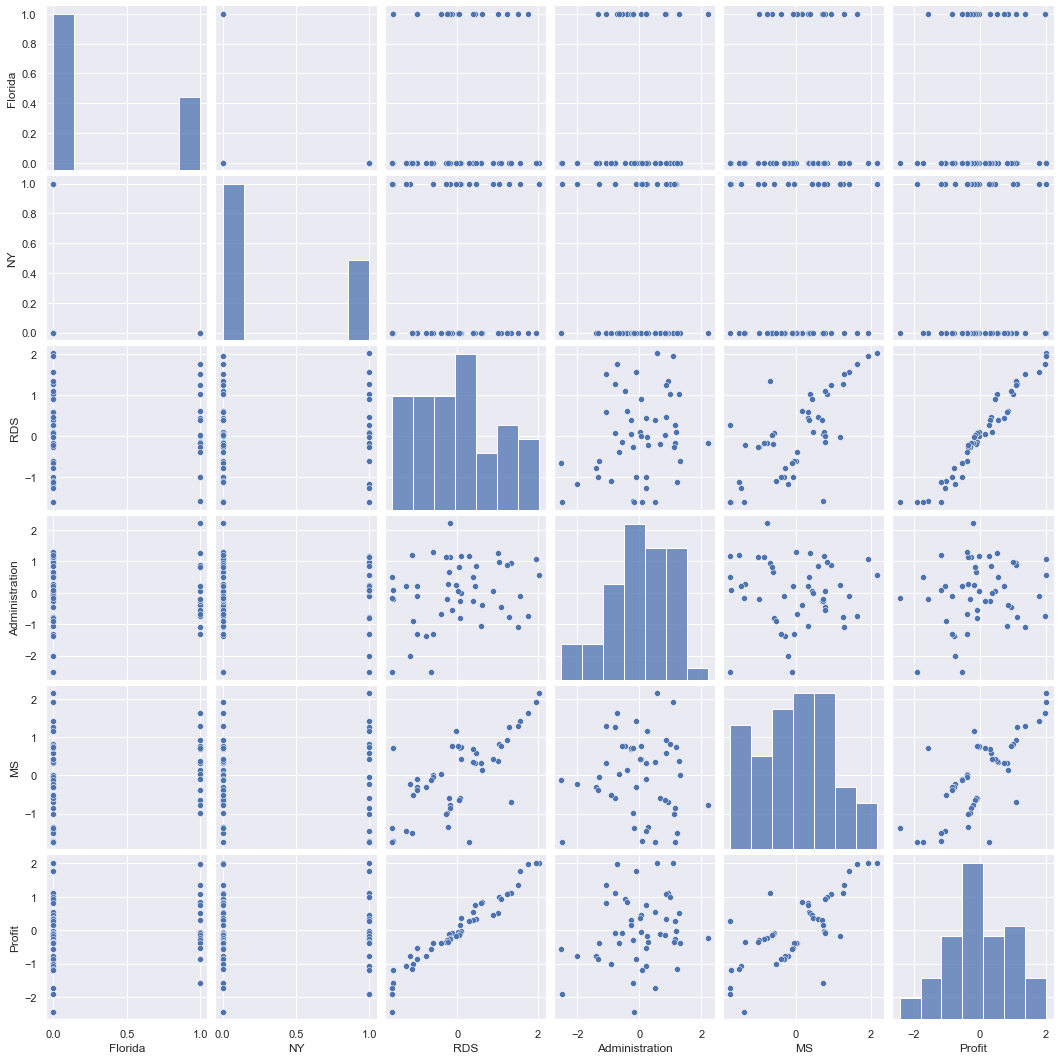

In [220]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [221]:
data = data.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


### Build Model

In [222]:
model1 = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data).fit()

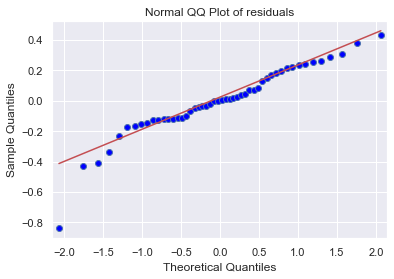

In [223]:
qqplot = sm.qqplot(model1.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

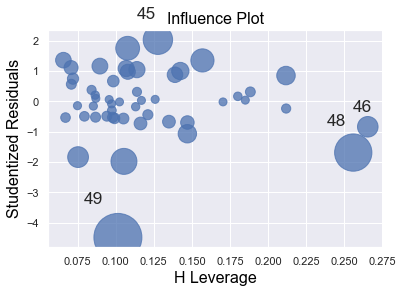

In [224]:
influence_plot(model1)
plt.show()

In [225]:
# Improving the model

data_new = data.drop(data.index[[45,46,48,49]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data_new).fit()
finalmodel1 = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predict1 = final_model.predict(new_data)

In [226]:
final_model.params

Intercept         0.047525
Florida          -0.022867
NY               -0.043733
RDS               0.880356
Administration   -0.036172
MS                0.085901
dtype: float64

In [227]:
finalmodel1

0.9629967080989382

In [228]:
predict1

1    153253.009644
dtype: float64

### *Method 2 : Power Transformer*

In [229]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [230]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [231]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [232]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(b)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(b)
df_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ptdata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.562570,0.529102,1.580363,1.987125
1,1.527028,1.131285,1.451634,1.975666
2,1.406784,-0.790378,1.279964,1.957572
3,1.284497,-0.174305,1.157809,1.758577
4,1.253427,-1.106257,1.071572,1.349158


In [233]:
df_ptdata = pd.concat([a,df_ptdata],axis=1)
df_ptdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


#### Finding Correlation

In [234]:
df_ptdata.corr()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
Florida,1.000000,-0.492366,0.126783,-0.001890,0.247013,0.117649
New York,-0.492366,1.000000,0.019613,0.017894,-0.110135,0.031600
R&D Spend,0.126783,0.019613,1.000000,0.237386,0.691854,0.960296
Administration,-0.001890,0.017894,0.237386,1.000000,-0.063801,0.182614
Marketing Spend,0.247013,-0.110135,0.691854,-0.063801,1.000000,0.700348
Profit,0.117649,0.031600,0.960296,0.182614,0.700348,1.000000


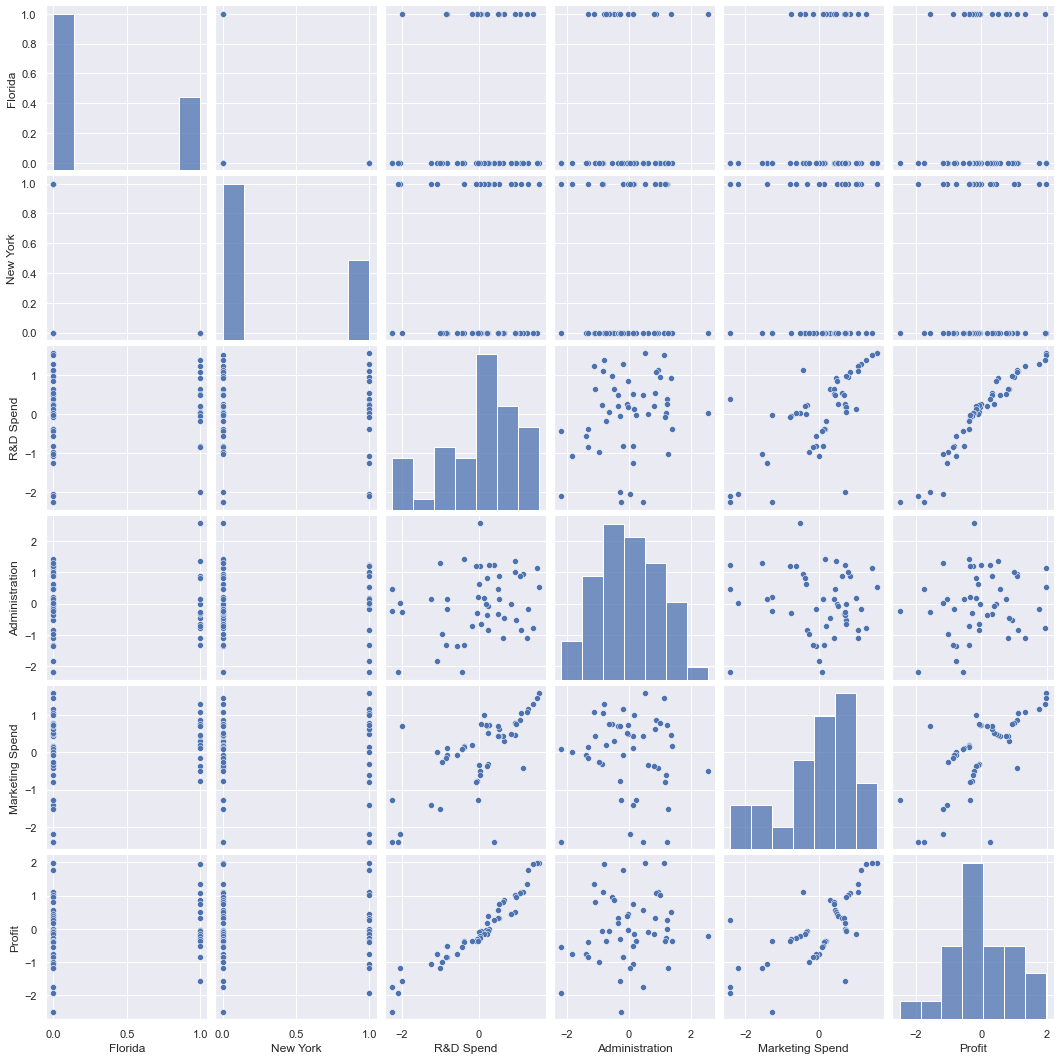

In [235]:
sns.set_style(style='darkgrid')
sns.pairplot(df_ptdata)

In [236]:
# Renaming Columns
data = df_ptdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


### Build Model

In [237]:
model2 = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data).fit()

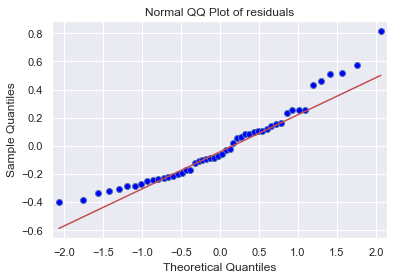

In [238]:
qqplot = sm.qqplot(model2.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

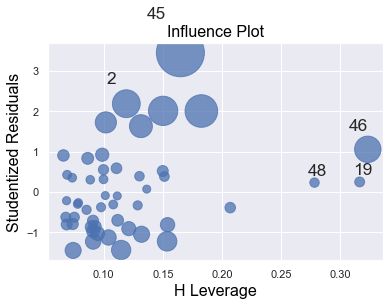

In [239]:
influence_plot(model2)
plt.show()

In [240]:
# Improving the model

data_new = data.drop(data.index[[2,45,46,48]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data_new).fit()
finalmodel2 = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predict2 = final_model.predict(new_data)

In [241]:
finalmodel2

0.9372576622771993

In [242]:
predict2

1    162243.625986
dtype: float64

In [243]:
final_model.params

Intercept         0.003959
Florida          -0.100814
NY               -0.052965
RDS               0.979961
Administration   -0.021787
MS                0.068208
dtype: float64

### *Method 3 : Quantile Transformer*

In [244]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [245]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [246]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [247]:
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(b)
qtdf = qt.transform(b)
df_qtdata = pd.DataFrame(data=qtdf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_qtdata.head()

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.693878,1.000000,1.000000
1,0.979592,0.836735,0.979592,0.979592
2,0.959184,0.224490,0.959184,0.959184
3,0.938776,0.448980,0.938776,0.938776
4,0.918367,0.122449,0.918367,0.918367


In [248]:
df_qtdata = pd.concat([a,df_qtdata],axis=1)
df_qtdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


#### Finding Correlation

In [249]:
df_qtdata.corr()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
Florida,1.000000,-0.492366,0.110625,-0.080218,0.206453,0.118841
New York,-0.492366,1.000000,0.046236,0.077530,-0.021737,0.024868
R&D Spend,0.110625,0.046236,1.000000,0.191636,0.709263,0.989799
Administration,-0.080218,0.077530,0.191636,1.000000,-0.095773,0.168595
Marketing Spend,0.206453,-0.021737,0.709263,-0.095773,1.000000,0.720297
Profit,0.118841,0.024868,0.989799,0.168595,0.720297,1.000000


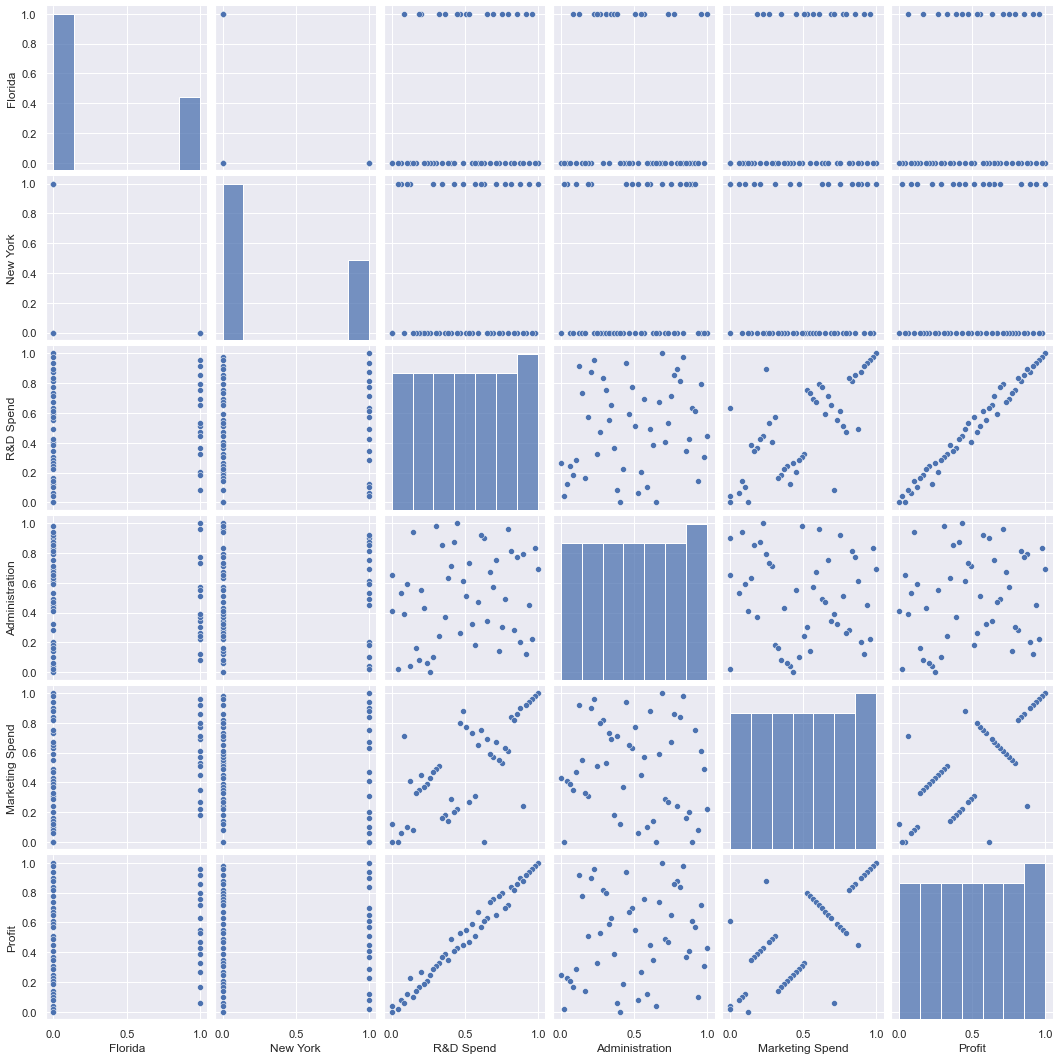

In [250]:
sns.set_style(style='darkgrid')
sns.pairplot(df_qtdata)

In [251]:
# Renaming Columns
data = df_qtdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


### Build Model

In [252]:
model3 = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data).fit()

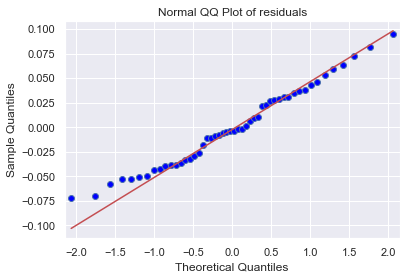

In [253]:
#  Residual Analysis
qqplot = sm.qqplot(model3.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

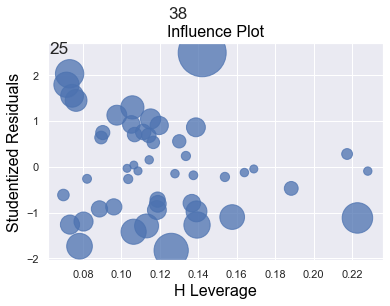

In [254]:
influence_plot(model3)
plt.show()

In [256]:
model_influence = model3.get_influence()
(c,x) = model_influence.cooks_distance

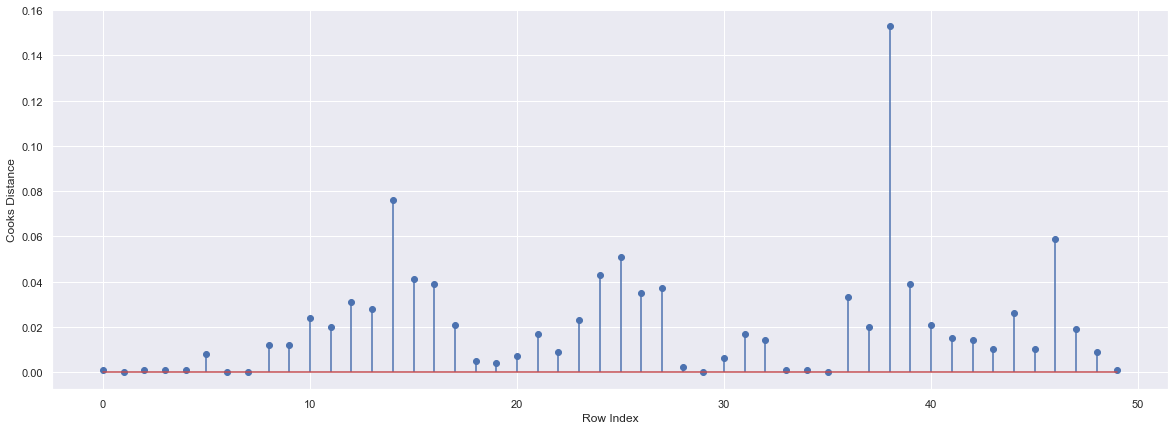

In [257]:
# Plot influencers using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [258]:
# Improving the model

data_new = data.drop(data.index[[14,25,38,46]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data_new).fit()
modelqt = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predict3 = final_model.predict(new_data)

In [259]:
modelqt

0.9858934157374921

In [260]:
final_model.params

Intercept        -0.004833
Florida           0.008680
NY               -0.016349
RDS               0.973350
Administration    0.004242
MS                0.036312
dtype: float64

In [146]:
predict3

1    149675.948749
dtype: float64

### *Method 3 : Normalization*

In [295]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [296]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [297]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [298]:
n = Normalizer()
ndf = n.fit_transform(b)
ndf = n.transform(b)
df_ndata = pd.DataFrame(data=ndf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ndata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,0.299093,0.247629,0.853391,0.347775
1,0.305549,0.284464,0.834161,0.360410
2,0.315397,0.207903,0.838503,0.392701
3,0.311201,0.255803,0.826004,0.394254
4,0.325807,0.209532,0.839508,0.381016


In [299]:
df_ndata = pd.concat([a,df_ndata],axis=1)
df_ndata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,0.299093,0.247629,0.853391,0.347775
1,0,0,0.305549,0.284464,0.834161,0.360410
2,1,0,0.315397,0.207903,0.838503,0.392701
3,0,1,0.311201,0.255803,0.826004,0.394254
4,1,0,0.325807,0.209532,0.839508,0.381016


#### Finding Correlation

In [300]:
df_ndata.corr()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
Florida,1.000000,-0.492366,0.090983,-0.216427,0.261461,-0.109965
New York,-0.492366,1.000000,0.004907,0.069968,-0.172158,0.182760
R&D Spend,0.090983,0.004907,1.000000,-0.396416,0.220266,0.497899
Administration,-0.216427,0.069968,-0.396416,1.000000,-0.909188,0.212358
Marketing Spend,0.261461,-0.172158,0.220266,-0.909188,1.000000,-0.447095
Profit,-0.109965,0.182760,0.497899,0.212358,-0.447095,1.000000


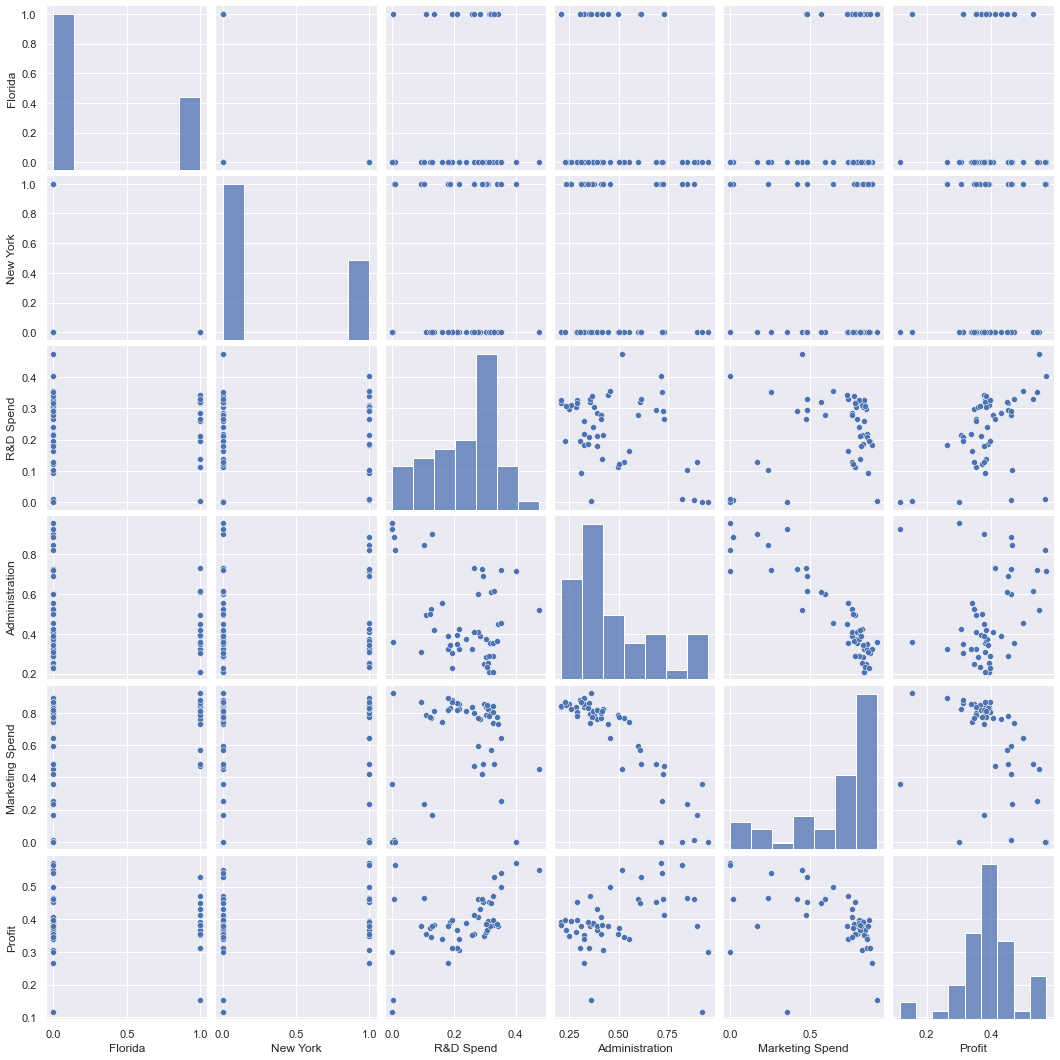

In [301]:
sns.set_style(style='darkgrid')
sns.pairplot(df_ndata)

In [302]:
# Renaming Columns
data = df_ndata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,0.299093,0.247629,0.853391,0.347775
1,0,0,0.305549,0.284464,0.834161,0.360410
2,1,0,0.315397,0.207903,0.838503,0.392701
3,0,1,0.311201,0.255803,0.826004,0.394254
4,1,0,0.325807,0.209532,0.839508,0.381016


### Build Model

In [303]:
model4 = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data).fit()

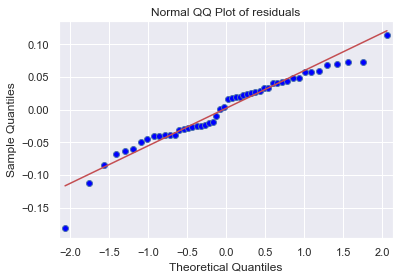

In [304]:
qqplot = sm.qqplot(model4.resid,line = 'q')
plt.title("Normal QQ Plot of residuals")
plt.show()

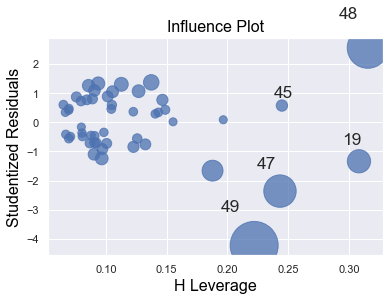

In [305]:
influence_plot(model4)
plt.show()

In [306]:
model_influence = model4.get_influence()
(c,x) = model_influence.cooks_distance

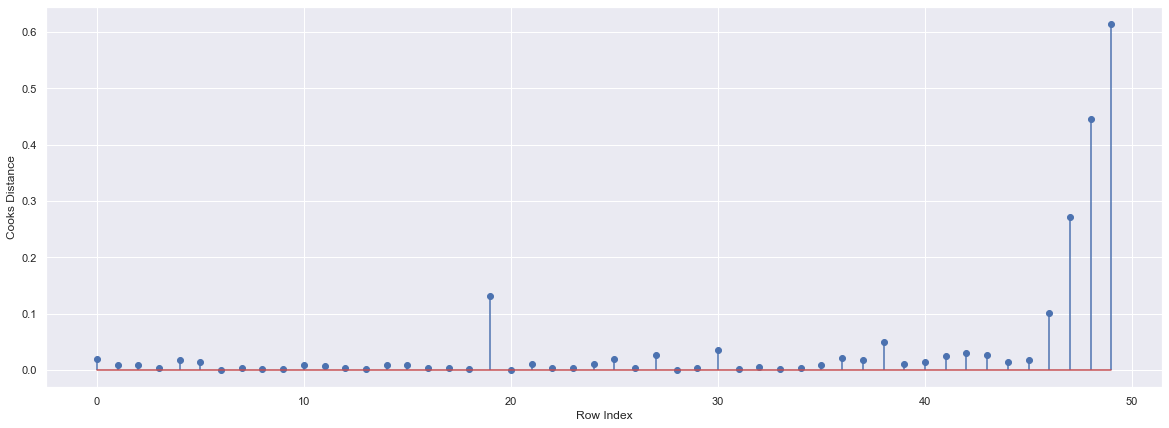

In [307]:
# Plot influencers using stem plot
fig = plt.subplots(figsize = (20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [308]:
# Improving the model

data_new = data.drop(data.index[[47,48,49]],axis=0).reset_index()
data_new = data_new.drop(['index'],axis=1)

# Final Model Building

final_model = smf.ols('Profit~Florida+NY+RDS+Administration+MS',data=data_new).fit()
modelnorm = final_model.rsquared

# Predict for given data

new_data = pd.DataFrame({'Florida':1,'NY':0,'RDS':142107,'Administration':91391.8,'MS':366168},index=[1])
predict4 = final_model.predict(new_data)

In [309]:
modelnorm

0.7397068554087449

In [310]:
predict4

1   -42999.587575
dtype: float64

In [311]:
final_model.params

Intercept         0.510190
Florida          -0.013135
NY               -0.014780
RDS               0.367510
Administration   -0.052364
MS               -0.246991
dtype: float64

### *Using Sk Learn Library for Linear Regression*

In [319]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [320]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [321]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [322]:
c = pd.concat([a,b],axis=1)
c.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,165349.20,136897.80,471784.10,192261.83
1,0,0,162597.70,151377.59,443898.53,191792.06
2,1,0,153441.51,101145.55,407934.54,191050.39
3,0,1,144372.41,118671.85,383199.62,182901.99
4,1,0,142107.34,91391.77,366168.42,166187.94


### Build Model

In [323]:
x = c.iloc[:,0:-1]
y = c.iloc[:,-1]

In [324]:
# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [325]:
X_test

,Florida,New York,R&D Spend,Administration,Marketing Spend
22,1,0,73994.56,122782.75,303319.26
15,0,1,114523.61,122616.84,261776.23
8,0,1,120542.52,148718.95,311613.29
5,0,1,131876.90,99814.71,362861.36
16,0,0,78013.11,121597.55,264346.06
0,0,1,165349.20,136897.80,471784.10
7,1,0,130298.13,145530.06,323876.68
23,1,0,67532.53,105751.03,304768.73
6,0,0,134615.46,147198.87,127716.82
43,0,1,15505.73,127382.30,35534.17


In [326]:
y_pred

array([115958.87358312, 146379.5163091 , 151719.24862523, 164204.1060435 ,
       118891.46385256, 193397.14366339, 162232.6465297 , 111269.40964361,
       161187.63795116,  58397.13606748, 113053.68164507,  45637.53512621,
        89612.56328395, 130731.21335306,  48802.51234825])

In [327]:
r2scorewt = r2_score(y_test,y_pred)
r2scorewt

0.9185145743774992

### Sk Learn with Standard Scaler Transformation

In [334]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [335]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [336]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [337]:
b.iloc[:,:] = StandardScaler().fit_transform(b.iloc[:,:])
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,2.016411,0.560753,2.153943,2.011203
1,1.955860,1.082807,1.923600,1.999430
2,1.754364,-0.728257,1.626528,1.980842
3,1.554784,-0.096365,1.422210,1.776627
4,1.504937,-1.079919,1.281528,1.357740


In [338]:
c=pd.concat([a,b],axis=1)
c.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [339]:
# Renaming Columns
data = c.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head() 

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,2.016411,0.560753,2.153943,2.011203
1,0,0,1.955860,1.082807,1.923600,1.999430
2,1,0,1.754364,-0.728257,1.626528,1.980842
3,0,1,1.554784,-0.096365,1.422210,1.776627
4,1,0,1.504937,-1.079919,1.281528,1.357740


In [341]:
# Build Model
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [342]:
# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
y_pred1

array([-0.19372593,  0.51437817,  0.54881245, -0.98814021,  1.70191593,
        0.063574  , -1.14202932, -0.34103513,  0.06233387,  1.43742633,
       -0.38821036, -0.60078488, -0.02663199, -0.54117452,  0.40118769])

In [343]:
X_test

,Florida,NY,RDS,Administration,MS
28,1,0,-0.168793,2.210141,-0.767189
11,0,0,0.593085,-1.065540,0.319834
10,1,0,0.620398,-0.387599,0.149807
41,1,0,-1.008534,-1.320796,-0.384552
2,1,0,1.754364,-0.728257,1.626528
27,0,1,-0.035519,0.235069,1.174271
38,0,1,-1.177178,-1.997270,-0.212785
31,0,1,-0.276958,1.130554,-1.014419
22,1,0,0.006007,0.051850,0.762376
4,1,0,1.504937,-1.079919,1.281528


In [345]:
r2scorewt1 = r2_score(y_test,y_pred1)
r2scorewt1

0.9358680970046518

### SK Learn with Power Transformer

In [346]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [347]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [349]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [350]:
# Power Transformer-yeo-johnson

pt = PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(b)
calc_lambdas = skl_yeojohnson.lambdas_
skl_yeojohnson = pt.transform(b)
df_ptdata = pd.DataFrame(data=skl_yeojohnson, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ptdata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.562570,0.529102,1.580363,1.987125
1,1.527028,1.131285,1.451634,1.975666
2,1.406784,-0.790378,1.279964,1.957572
3,1.284497,-0.174305,1.157809,1.758577
4,1.253427,-1.106257,1.071572,1.349158


In [351]:
df_ptdata = pd.concat([a,df_ptdata],axis=1)
df_ptdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


In [353]:
# Renaming Columns
data = df_ptdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.562570,0.529102,1.580363,1.987125
1,0,0,1.527028,1.131285,1.451634,1.975666
2,1,0,1.406784,-0.790378,1.279964,1.957572
3,0,1,1.284497,-0.174305,1.157809,1.758577
4,1,0,1.253427,-1.106257,1.071572,1.349158


In [354]:
# Build Model

x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred2 = model.predict(X_test)

In [356]:
r2scorewt2 = r2_score(y_test,y_pred2)
r2scorewt2

0.8466151526757891

### SK LEARN WITH QUANTILE TRANSFORMATION

In [357]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [358]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [359]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [360]:
# Quantile Transformer
qt = QuantileTransformer(random_state=0)
qtdf = qt.fit_transform(b)
qtdf = qt.transform(b)
df_qtdata = pd.DataFrame(data=qtdf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_qtdata.head()

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.693878,1.000000,1.000000
1,0.979592,0.836735,0.979592,0.979592
2,0.959184,0.224490,0.959184,0.959184
3,0.938776,0.448980,0.938776,0.938776
4,0.918367,0.122449,0.918367,0.918367


In [362]:
df_qtdata = pd.concat([a,df_qtdata],axis=1)
df_qtdata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [364]:
# Renaming Columns
data = df_qtdata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [365]:
# Build Model

x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred3 = model.predict(X_test)

In [366]:
y_pred3

array([0.45568627, 0.73258242, 0.75906876, 0.19689837, 0.97016295,
       0.48714675, 0.11278227, 0.32761871, 0.52960953, 0.92871813,
       0.34159155, 0.27365606, 0.53492491, 0.31843876, 0.66511486])

In [369]:
r2scorewt3 = r2_score(y_test,y_pred3)
r2scorewt3

0.9697482460452594

### SK Learn with Normalizer

In [378]:
df = pd.read_csv('E:/ExcelR Assignment/Assignment 5 - Multi Linear Regression/50_Startups.csv')

In [379]:
a = pd.get_dummies(df['State'],drop_first=True)
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [380]:
b = df.drop('State',axis=1)
b.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [381]:
# Normalizer
n = Normalizer()
ndf = n.fit_transform(b)
ndf = n.transform(b)
df_ndata = pd.DataFrame(data=qtdf, columns=['R&D Spend','Administration','Marketing Spend','Profit'])
df_ndata.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,1.000000,0.693878,1.000000,1.000000
1,0.979592,0.836735,0.979592,0.979592
2,0.959184,0.224490,0.959184,0.959184
3,0.938776,0.448980,0.938776,0.938776
4,0.918367,0.122449,0.918367,0.918367


In [382]:
df_ndata = pd.concat([a,df_ndata],axis=1)
df_ndata.head()

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [384]:
# Renaming Columns
data = df_ndata.rename(columns={"New York":"NY","R&D Spend":"RDS","Marketing Spend":"MS"})
data.head()

,Florida,NY,RDS,Administration,MS,Profit
0,0,1,1.000000,0.693878,1.000000,1.000000
1,0,0,0.979592,0.836735,0.979592,0.979592
2,1,0,0.959184,0.224490,0.959184,0.959184
3,0,1,0.938776,0.448980,0.938776,0.938776
4,1,0,0.918367,0.122449,0.918367,0.918367


In [385]:
# Build Model

x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

# Deciding Train and Test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)
y_pred4 = model.predict(X_test)

In [388]:
r2scorewt4 = r2_score(y_test,y_pred4)
r2scorewt4

0.9697482460452594

In [390]:
Analysis = {'Method':['OLS Without Transformation','OLS with Standard Scaler','OLS with Power Transformation','OLS with Quantile Transformation','OLS with Normalization'],'R-Squared Values':[finalmodelwt,finalmodel1,finalmodel2,modelqt,modelnorm],'Predicted Value':[predictwt,predict1,predict2,predict3,predict4]}
Analysis = pd.DataFrame(Analysis)

Analysis1 = {'Method':['Sklearn LR without Transformation','Sklearn LR with Standard Scaler','Sklearn LR with Power Transformation','Sklearn LR with Quantile Transformation','Sklearn LR with Normalization'],'R-Squared Values':[r2scorewt,r2scorewt1,r2scorewt2,r2scorewt3,r2scorewt4],'Predicted Values':[y_pred,y_pred1,y_pred2,y_pred3,y_pred4]}
Analysis1 = pd.DataFrame(Analysis1)

TotalAnalysis = pd.concat([Analysis,Analysis1],axis=1)
TotalAnalysis

,Method,R-Squared Values,Predicted Value,Method,R-Squared Values,Predicted Values
0,OLS Without Transformation,0.962997,1 171811.495683 dtype: float64,Sklearn LR without Transformation,0.918515,"[115958.87358311839, 146379.51630909613, 15171..."
1,OLS with Standard Scaler,0.962997,1 153253.009644 dtype: float64,Sklearn LR with Standard Scaler,0.935868,"[-0.19372593254678153, 0.5143781657862363, 0.5..."
2,OLS with Power Transformation,0.937258,1 162243.625986 dtype: float64,Sklearn LR with Power Transformation,0.846615,"[0.05415379903789861, 0.5186501226039854, 0.54..."
3,OLS with Quantile Transformation,0.985893,1 152003.812286 dtype: float64,Sklearn LR with Quantile Transformation,0.969748,"[0.4556862696132795, 0.7325824239365348, 0.759..."
4,OLS with Normalization,0.739707,1 -42999.587575 dtype: float64,Sklearn LR with Normalization,0.969748,"[0.4556862696132795, 0.7325824239365348, 0.759..."
